What is a time series problem?  
Time series problems deal with data over time.

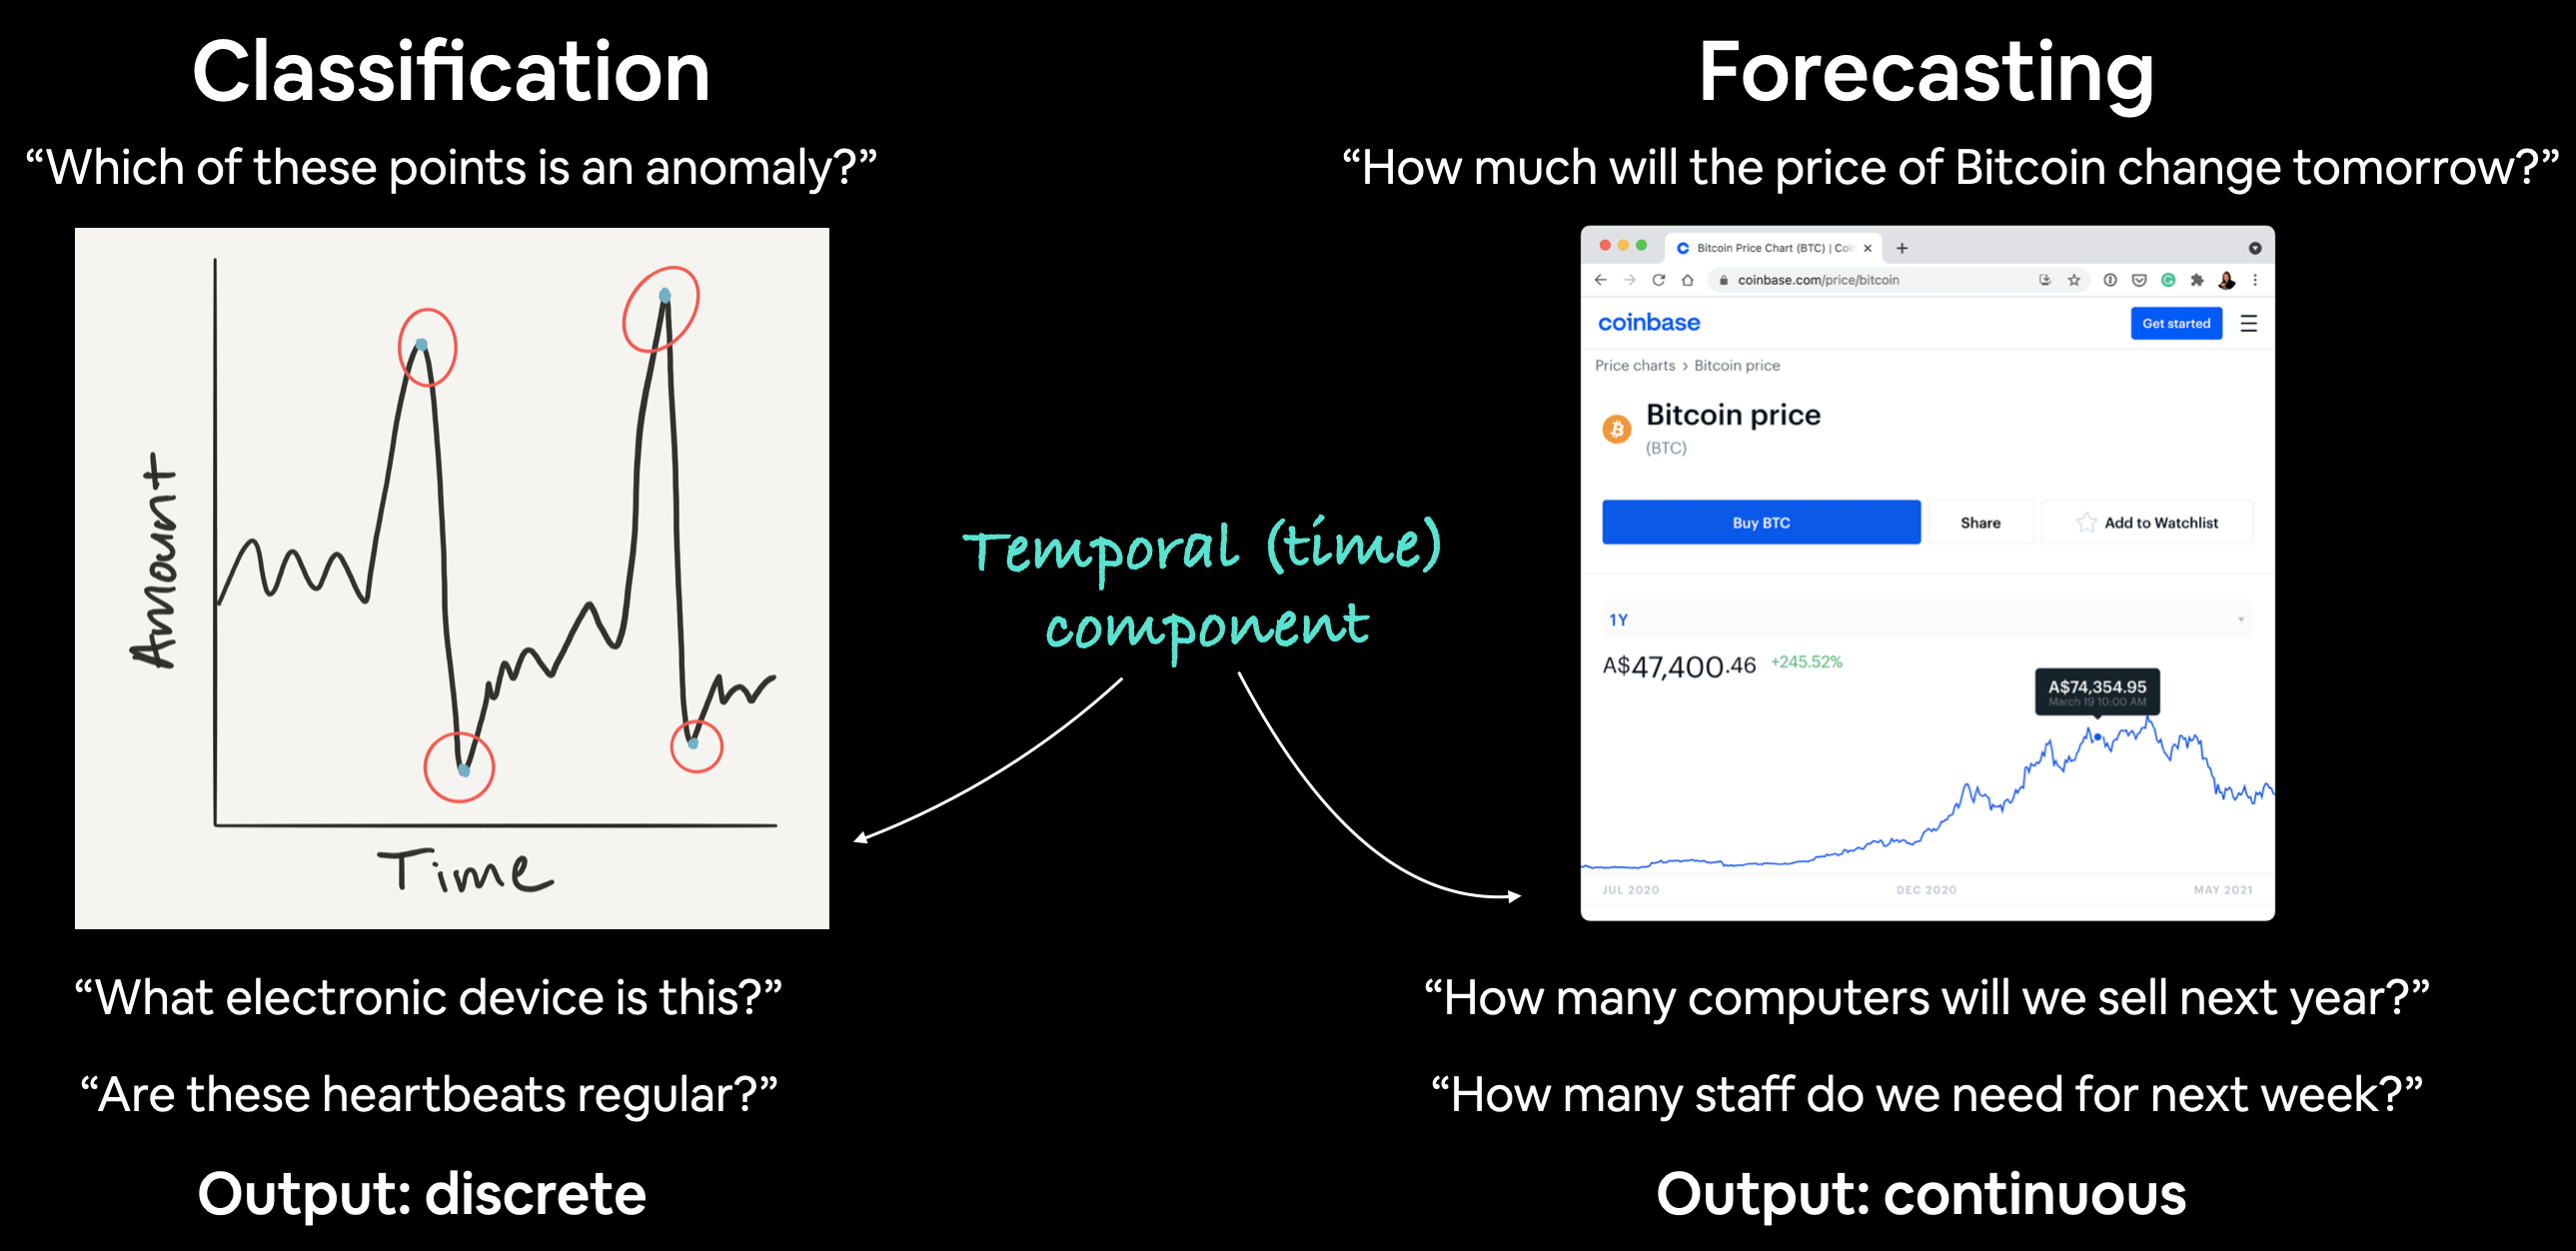

Classification	Problem : Anomaly detection, time series identification (where did this time series come from?)	Discrete (a label)  
Forecasting	problem : Predicting stock market prices, forecasting future demand for a product, stocking inventory requirements	Continuous (a number)


Get a data

In [3]:
import requests

url = "https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv"
response = requests.get(url)

with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv", "wb") as f:
    f.write(response.content)

print("File downloaded successfully!")


File downloaded successfully!


In [4]:
import pandas as pd
df=pd.read_csv("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv",index_col=["Date"])
df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2013-10-01,BTC,123.654990,124.304660,124.751660,122.563490
2013-10-02,BTC,125.455000,123.654990,125.758500,123.633830
2013-10-03,BTC,108.584830,125.455000,125.665660,83.328330
2013-10-04,BTC,118.674660,108.584830,118.675000,107.058160
2013-10-05,BTC,121.338660,118.674660,121.936330,118.005660
...,...,...,...,...,...
2021-05-14,BTC,49764.132082,49596.778891,51448.798576,46294.720180
2021-05-15,BTC,50032.693137,49717.354353,51578.312545,48944.346536
2021-05-16,BTC,47885.625255,49926.035067,50690.802950,47005.102292


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2787 entries, 2013-10-01 to 2021-05-18
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Currency             2787 non-null   object 
 1   Closing Price (USD)  2787 non-null   float64
 2   24h Open (USD)       2787 non-null   float64
 3   24h High (USD)       2787 non-null   float64
 4   24h Low (USD)        2787 non-null   float64
dtypes: float64(4), object(1)
memory usage: 130.6+ KB


In [6]:
len(df)

2787

Note: The frequency at which a time series value is collected is often referred to as seasonality. This is usually mesaured in number of samples per year. For example, collecting the price of Bitcoin once per day would result in a time series with a seasonality of 365. Time series data collected with different seasonality values often exhibit seasonal patterns (e.g. electricity demand behing higher in Summer months for air conditioning than Winter months).

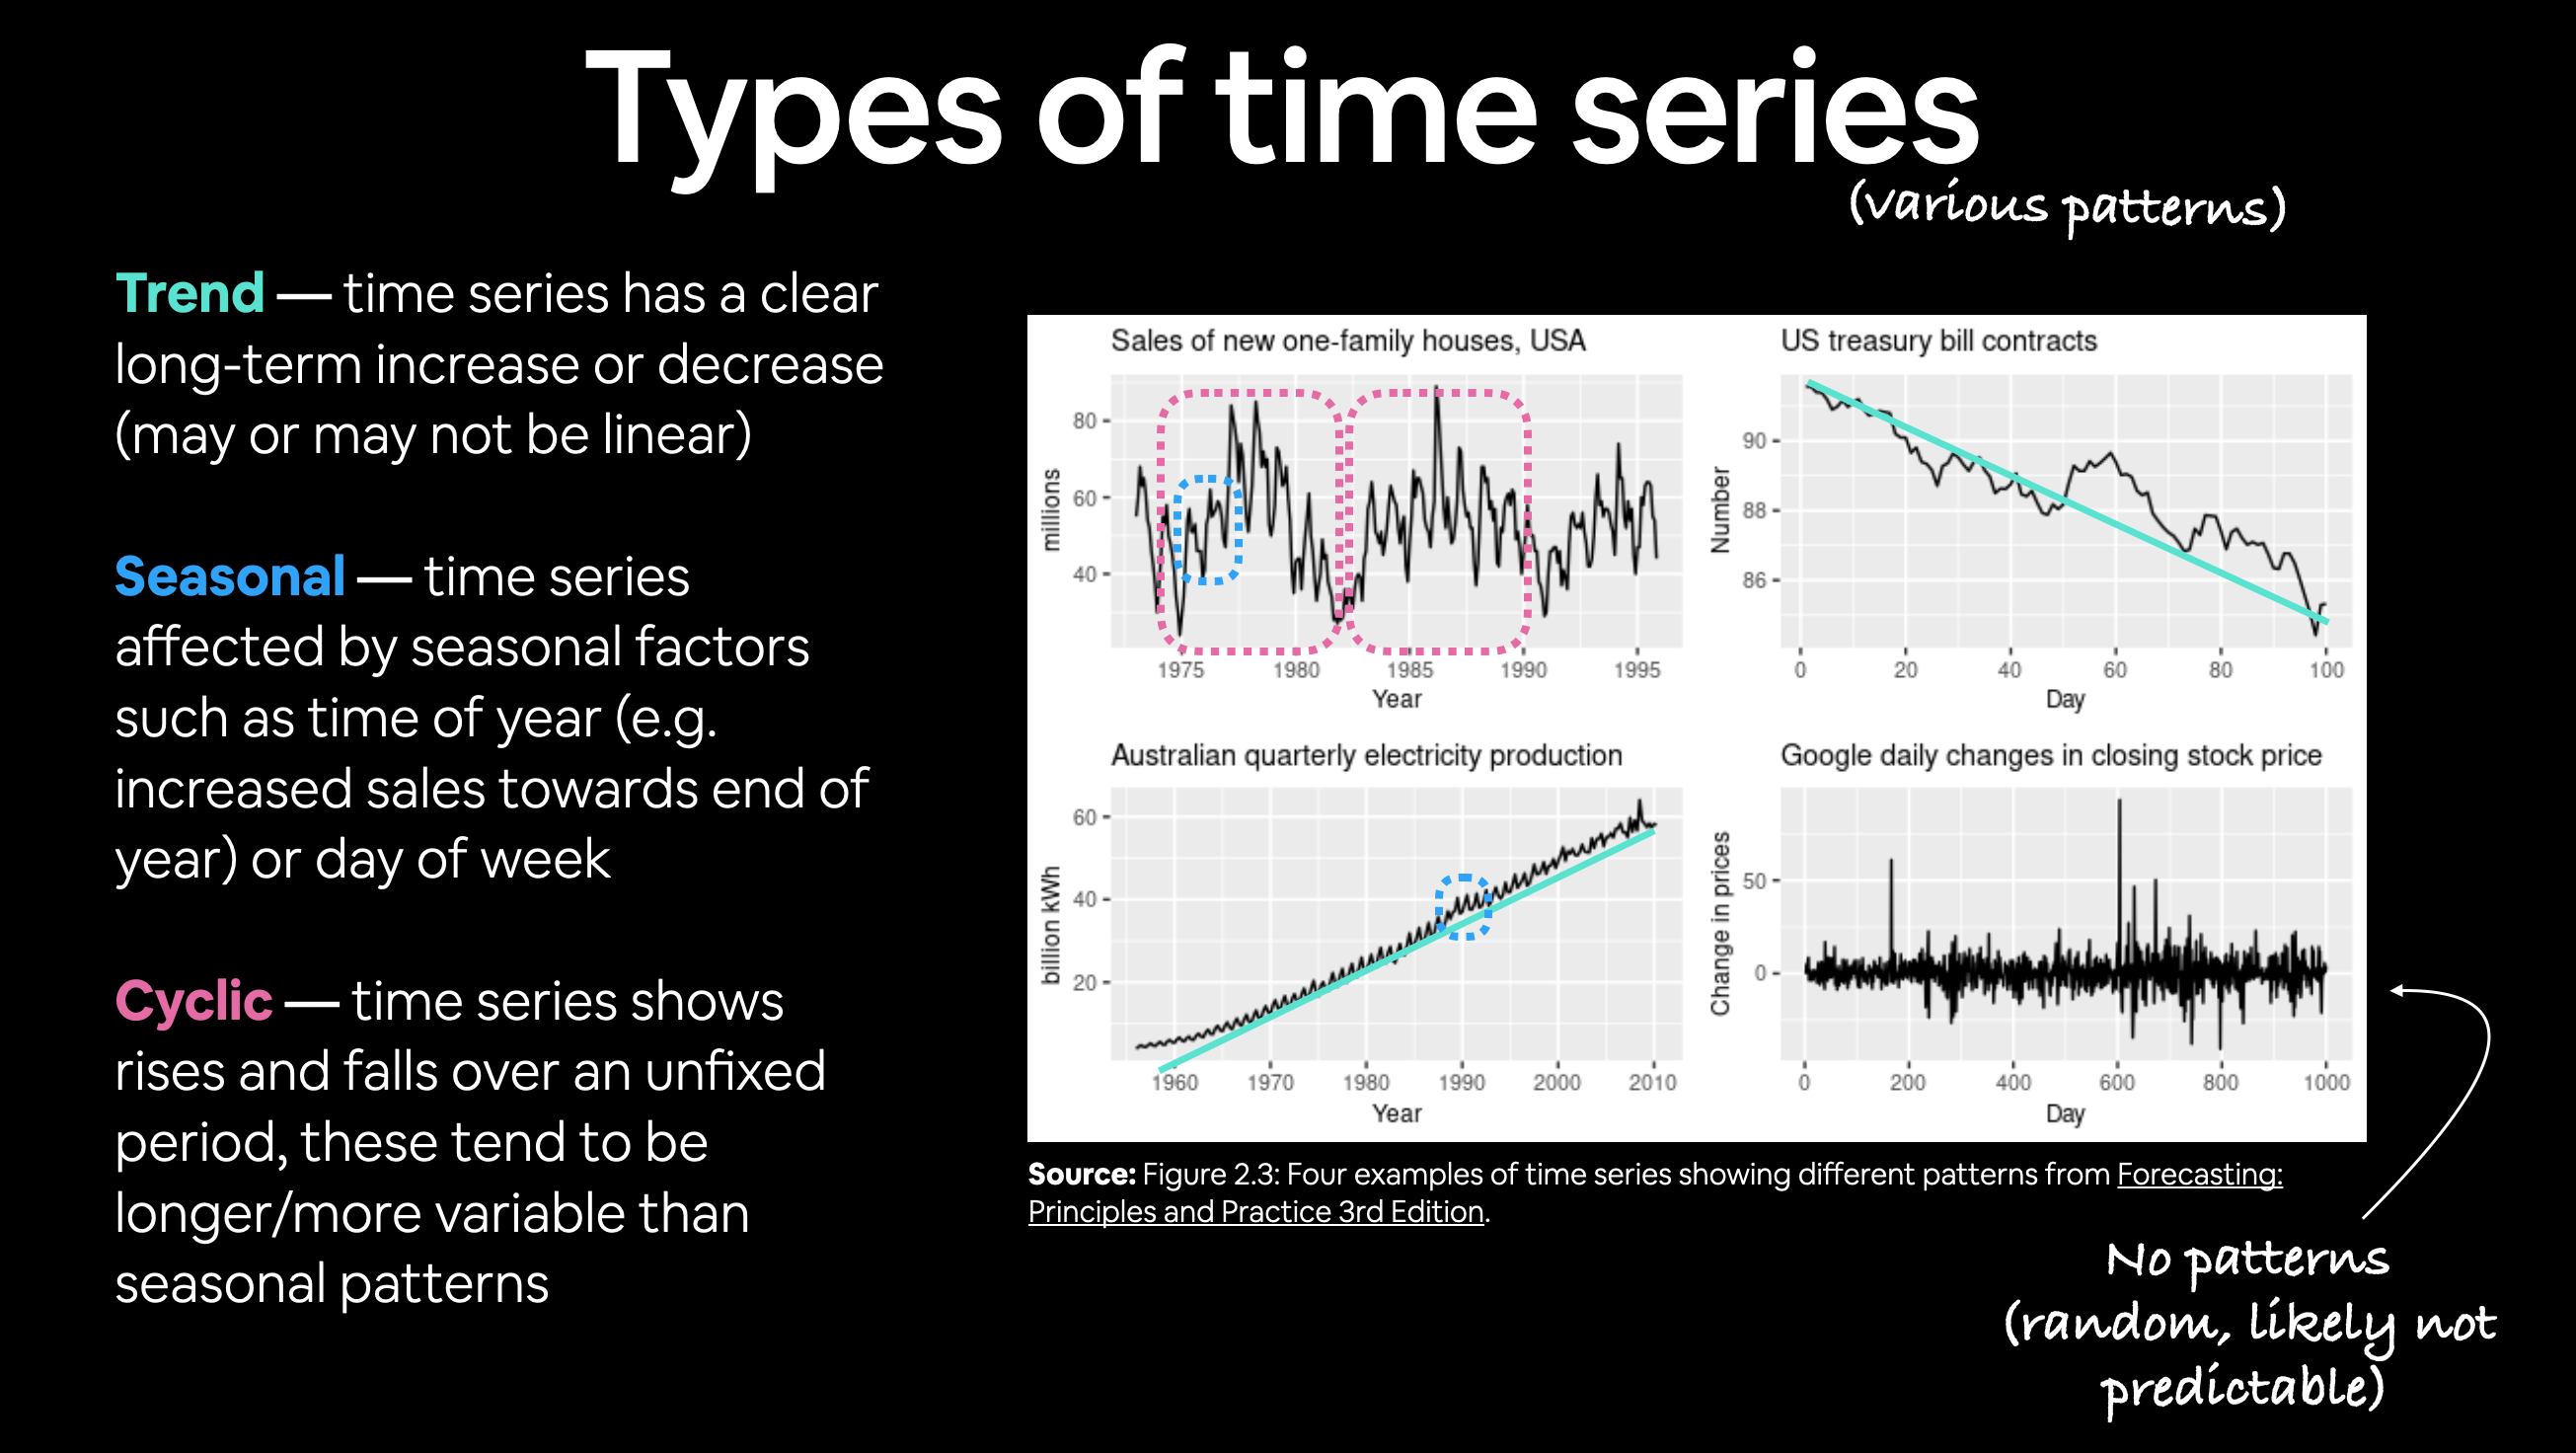

In [7]:
# only want closing price for each day

bitcoin_prices=pd.DataFrame(df["Closing Price (USD)"]).rename(columns={"Closing Price (USD)": "Price"})
bitcoin_prices

,Price
Date,
2013-10-01,123.654990
2013-10-02,125.455000
2013-10-03,108.584830
2013-10-04,118.674660
2013-10-05,121.338660
...,...
2021-05-14,49764.132082
2021-05-15,50032.693137
2021-05-16,47885.625255


Text(0, 0.5, 'BTC Price')

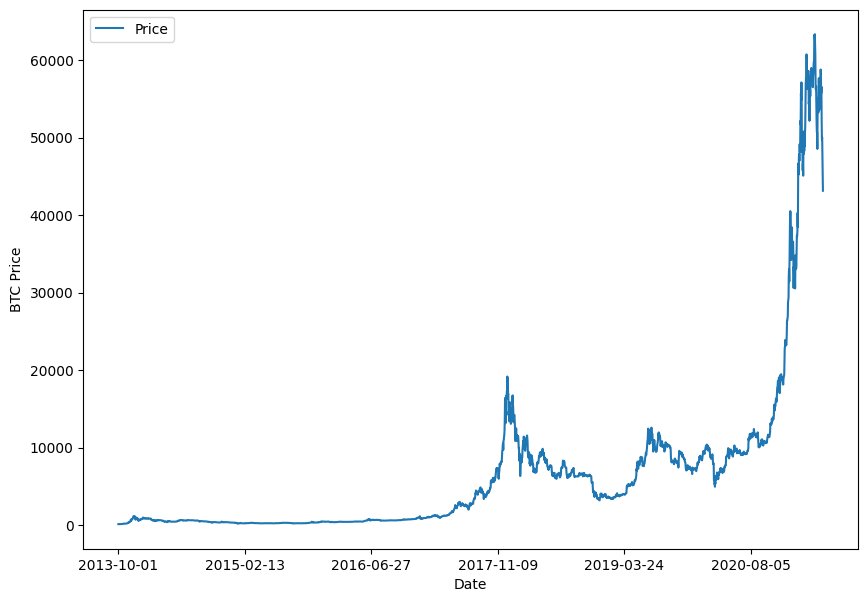

In [8]:
import matplotlib.pyplot as plt

bitcoin_prices.plot(figsize=(10,7))
plt.ylabel("BTC Price")

In [9]:
# importing and formatting historical bitcoin data with python

import csv
from datetime import datetime

timesteps=[]
btc_price=[]

with open("BTC_USD_2013-10-01_2021-05-18-CoinDesk.csv","r") as f:
    csv_reader=csv.reader(f,delimiter=",")
    next(csv_reader)
    for line in csv_reader:
        timesteps.append(datetime.strptime(line[1],"%Y-%m-%d"))
        btc_price.append(float(line[2]))

timesteps[:10],btc_price[:10]

([datetime.datetime(2013, 10, 1, 0, 0),
  datetime.datetime(2013, 10, 2, 0, 0),
  datetime.datetime(2013, 10, 3, 0, 0),
  datetime.datetime(2013, 10, 4, 0, 0),
  datetime.datetime(2013, 10, 5, 0, 0),
  datetime.datetime(2013, 10, 6, 0, 0),
  datetime.datetime(2013, 10, 7, 0, 0),
  datetime.datetime(2013, 10, 8, 0, 0),
  datetime.datetime(2013, 10, 9, 0, 0),
  datetime.datetime(2013, 10, 10, 0, 0)],
 [123.65499,
  125.455,
  108.58483,
  118.67466,
  121.33866,
  120.65533,
  121.795,
  123.033,
  124.049,
  125.96116])

Text(0.5, 0, 'Date')

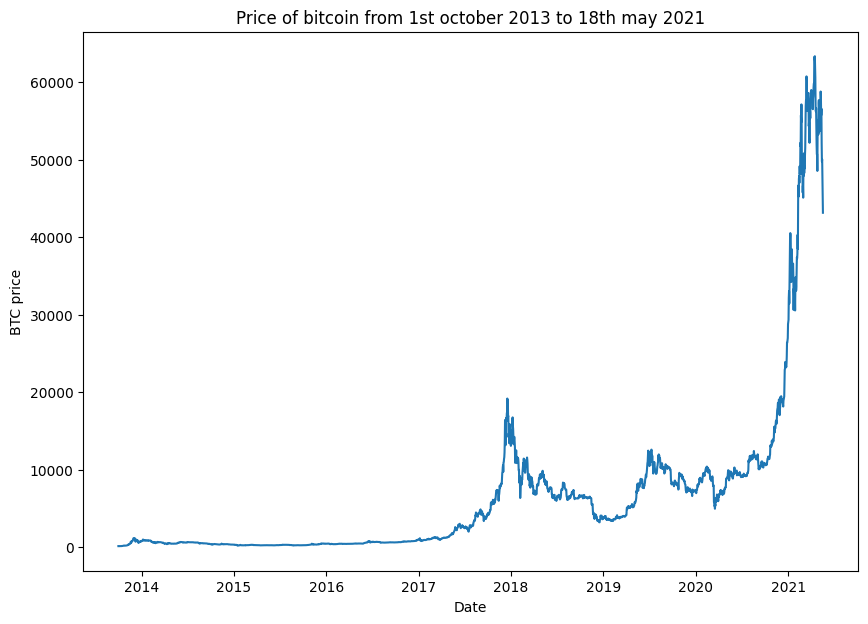

In [10]:
import matplotlib.pyplot as plt

import numpy as np

plt.figure(figsize=(10,7))
plt.plot(timesteps,btc_price)
plt.title("Price of bitcoin from 1st october 2013 to 18th may 2021")
plt.ylabel("BTC price")
plt.xlabel("Date")

Format Data Part 1: Creatining train and test sets for time series data

In time series problems, we'll either have univariate or multivariate data.


Univariate time series data deals with one variable, for example, using the price of Bitcoin to predict the price of Bitcoin.

Multivariate time series data deals with more than one variable, for example, predicting electricity demand using the day of week, time of year and number of houses in a region.

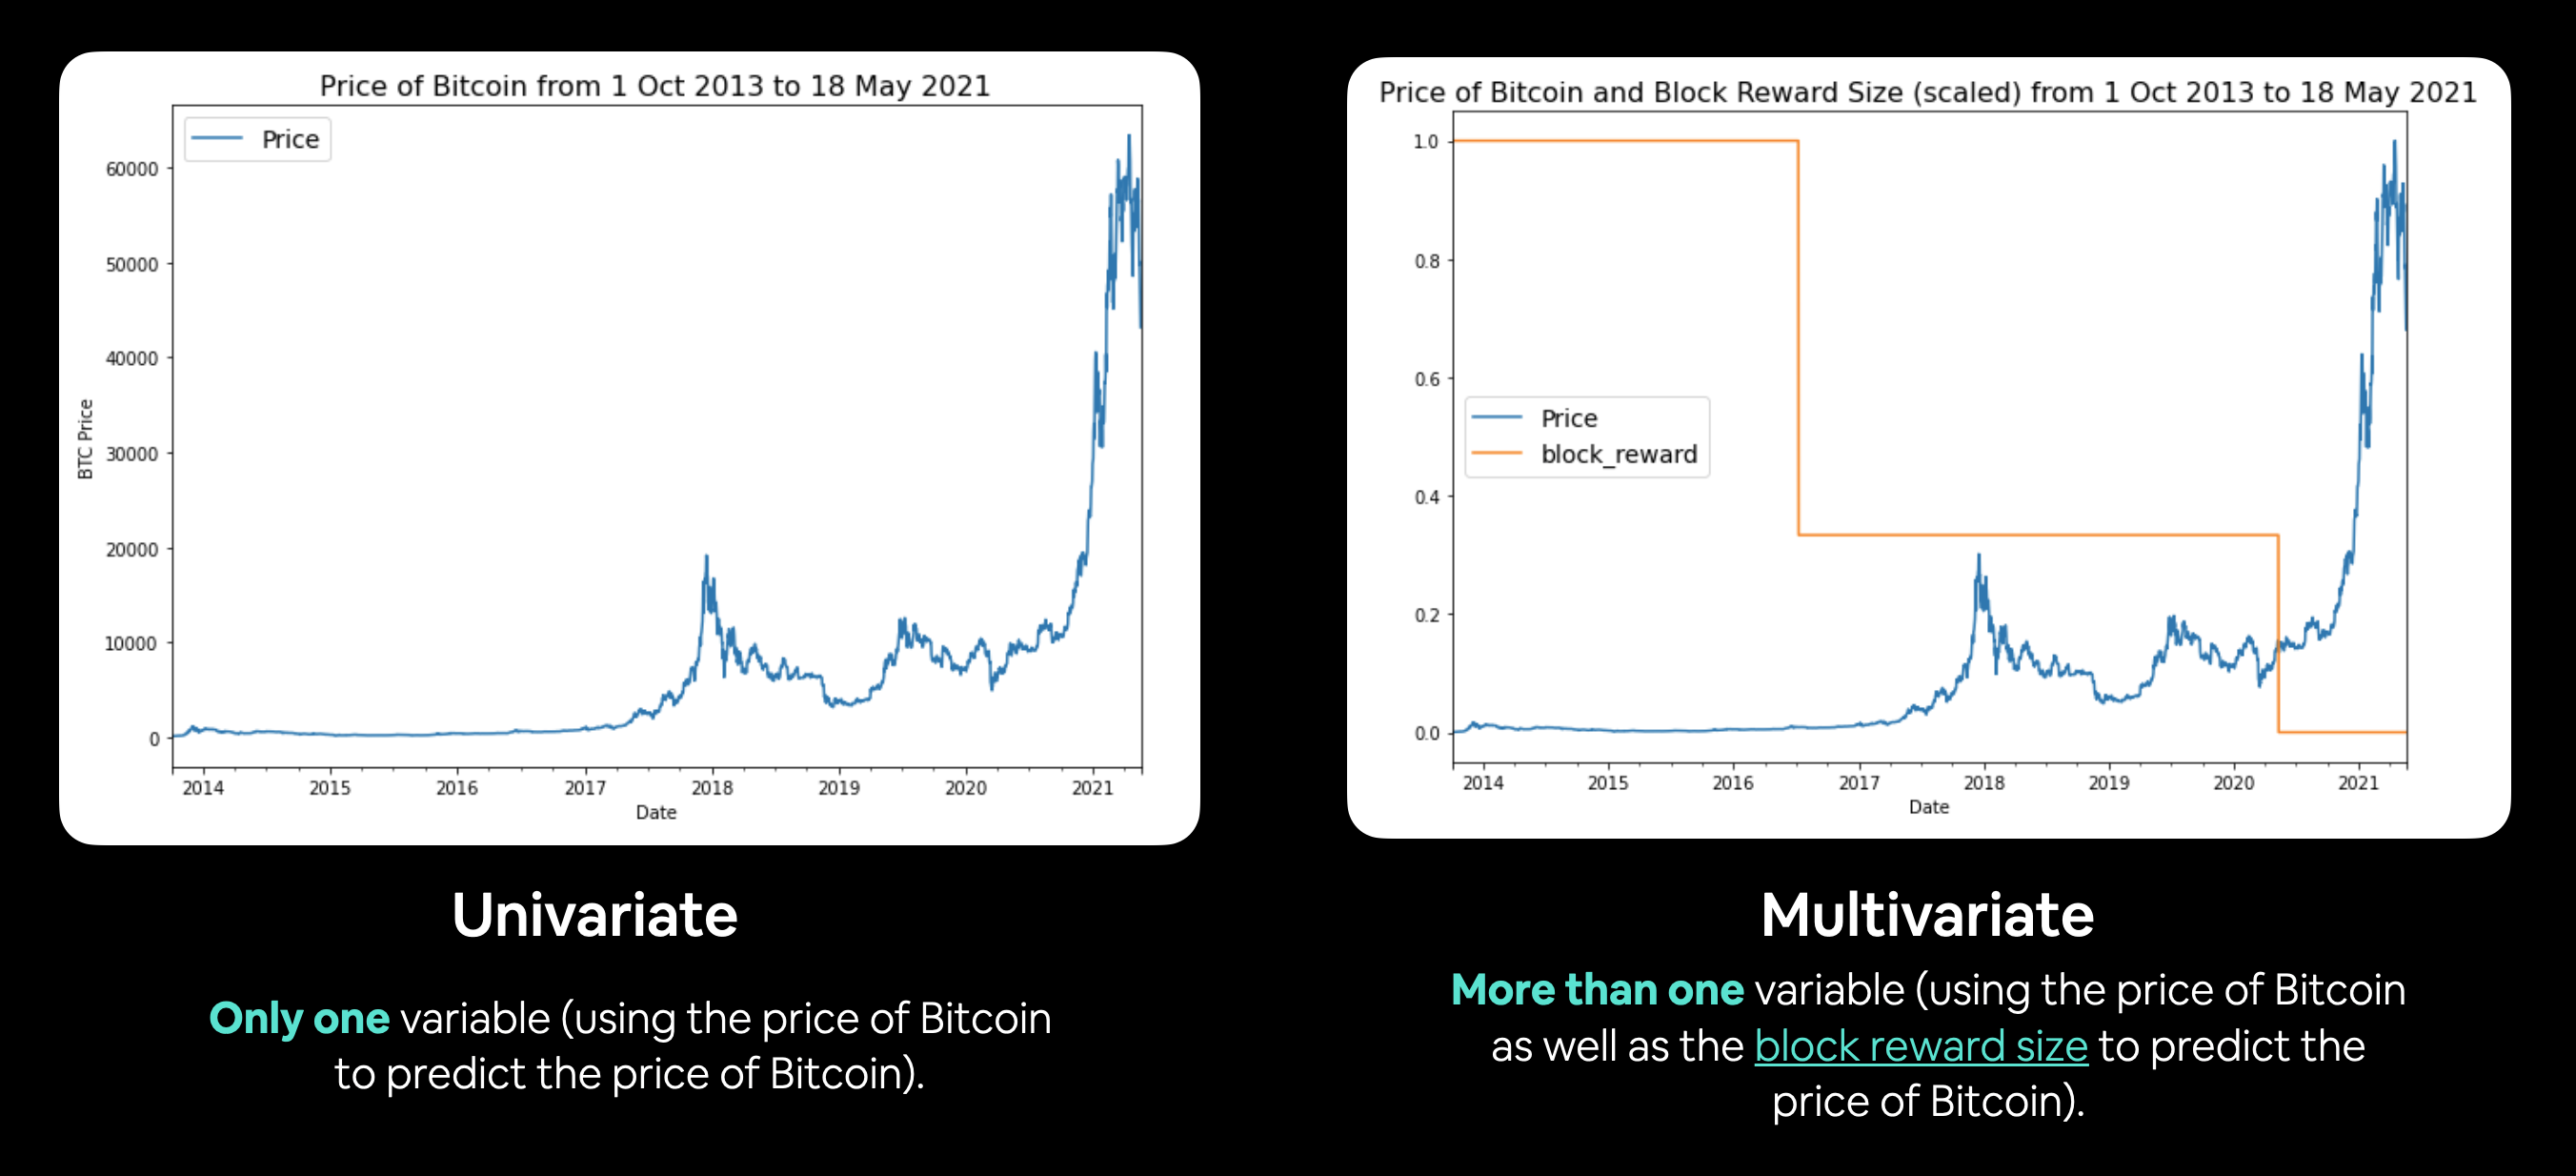

Create train & test sets for time series (the wrong way)

In [11]:
# Get bitcoin date array
timesteps = bitcoin_prices.index.to_numpy()
prices = bitcoin_prices["Price"].to_numpy()

timesteps[:10], prices[:10]

(array(['2013-10-01', '2013-10-02', '2013-10-03', '2013-10-04',
        '2013-10-05', '2013-10-06', '2013-10-07', '2013-10-08',
        '2013-10-09', '2013-10-10'], dtype=object),
 array([123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
        121.795  , 123.033  , 124.049  , 125.96116]))

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(timesteps, # dates
                                                    prices, # prices
                                                    test_size=0.2,
                                                    random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2229,), (558,), (2229,), (558,))

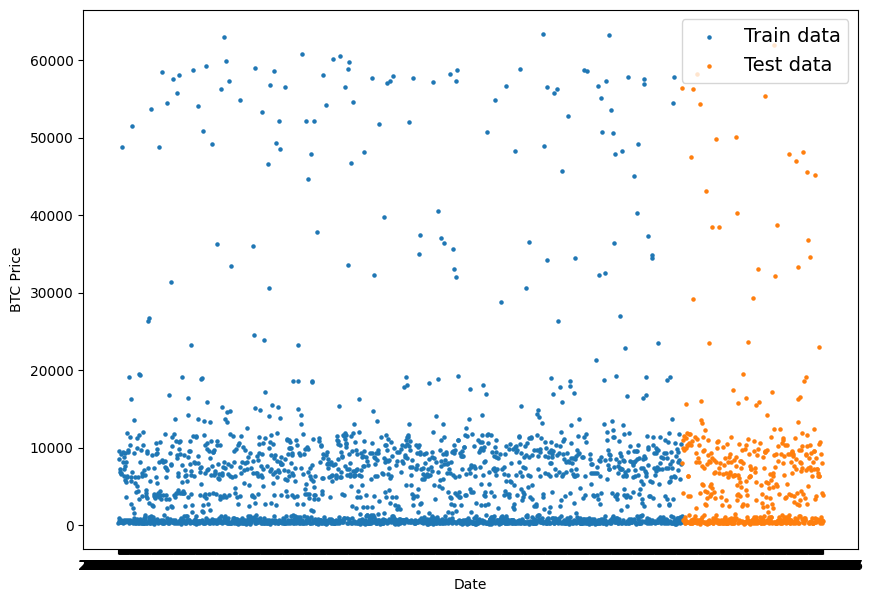

In [13]:
# Let's plot wrong train and test splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show()

Create train & test sets for time series (the right way)  
Of course, there's no way we can actually access data from the future.

But we can engineer our test set to be in the future with respect to the training set.

To do this, we can create an abitrary point in time to split our data.

Everything before the point in time can be considered the training set and everything after the point in time can be considered the test set.

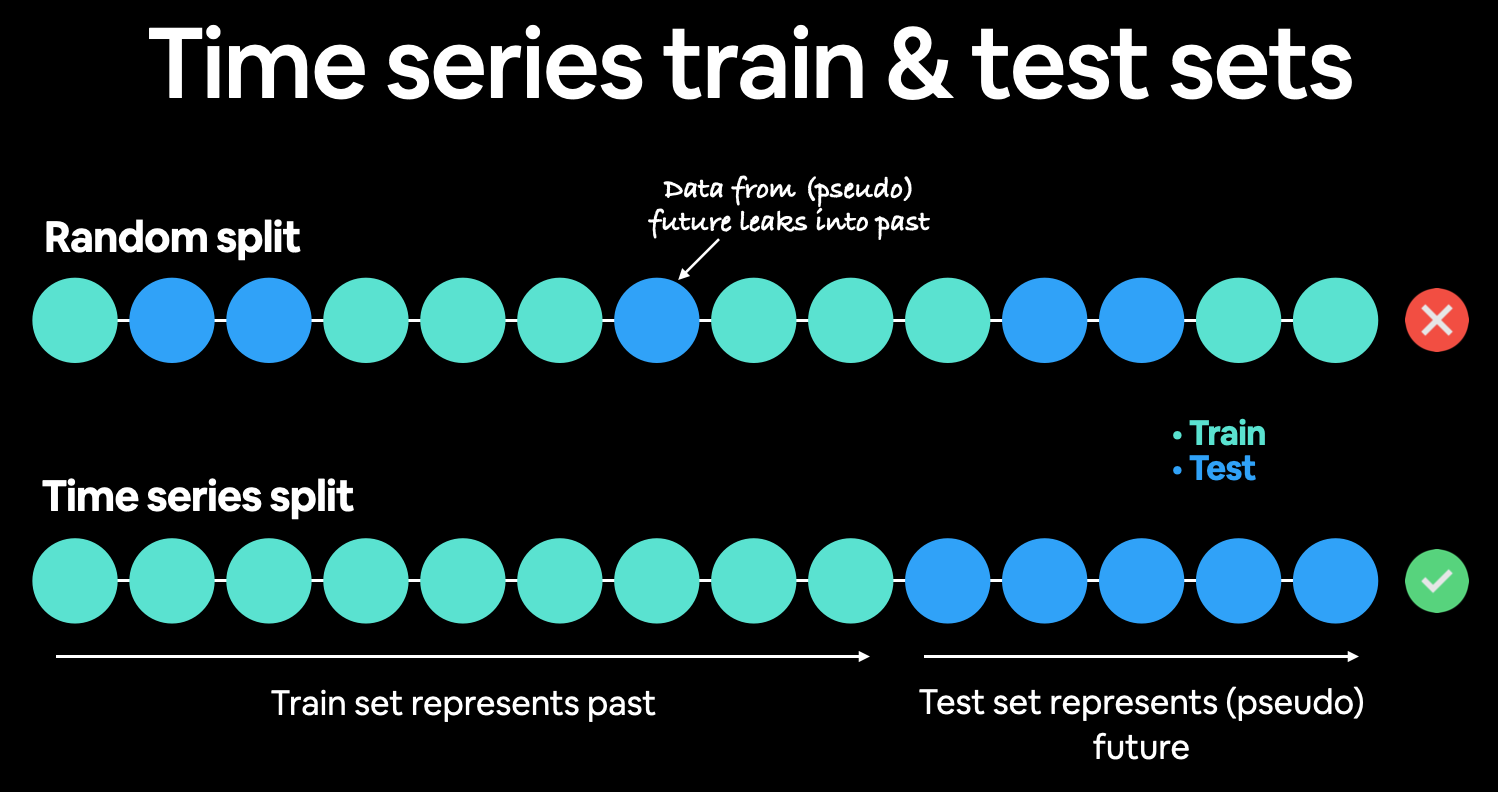

In [14]:
# Create train and test splits the right way for time series data
split_size = int(0.8 * len(prices)) # 80% train, 20% test

# Create train data splits (everything before the split)
X_train, y_train = timesteps[:split_size], prices[:split_size]

# Create test data splits (everything after the split)
X_test, y_test = timesteps[split_size:], prices[split_size:]

len(X_train), len(X_test), len(y_train), len(y_test)

(2229, 558, 2229, 558)

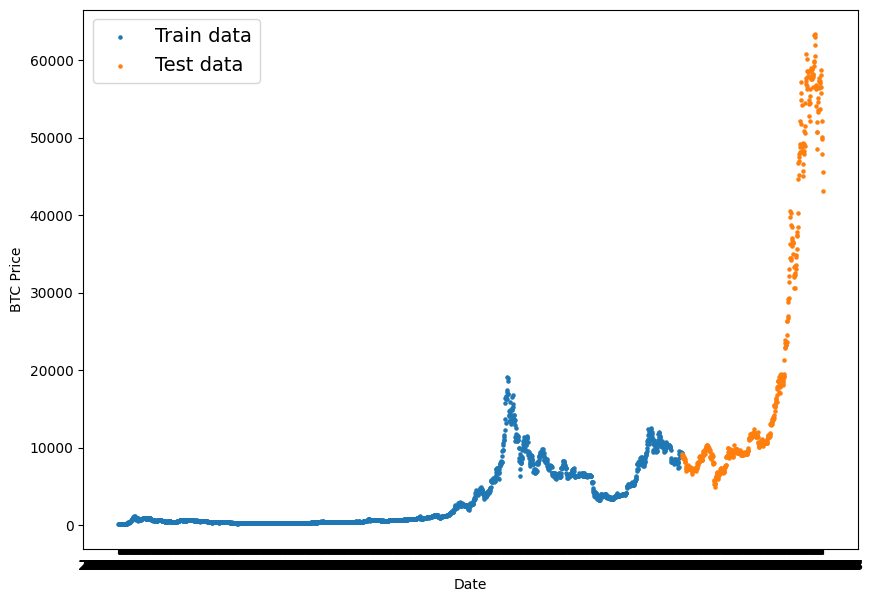

In [15]:
# Plot correctly made splits
plt.figure(figsize=(10, 7))
plt.scatter(X_train, y_train, s=5, label="Train data")
plt.scatter(X_test, y_test, s=5, label="Test data")
plt.xlabel("Date")
plt.ylabel("BTC Price")
plt.legend(fontsize=14)
plt.show();

using the training set (past) to train a model to try and predict values on the test set (future).

Create a plotting function

In [16]:
def plot_time_series(timesteps,values,format='.',start=0,end=None,label=None):
    plt.plot(timesteps[start:end],values[start:end],format,label=label)
    plt.xlabel("Time")
    plt.ylabel("BTC Price")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)
    

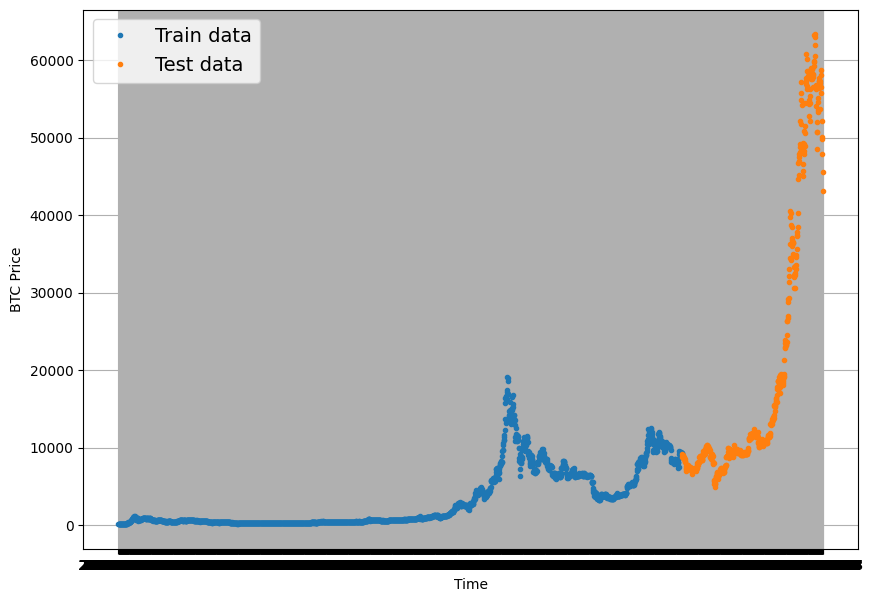

In [17]:
# Try out our plotting function
plt.figure(figsize=(10, 7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

Modelling Experiments

horizon = number of timesteps to predict into future  
window = number of timesteps from past used to predict horizon

Model 0: Naïve forecast (baseline)

The prediction at timestep t (y-hat) is equal to the value at timestep t-1 (the previous timestep).

Note: For the sake of this notebook, an open system is a system where inputs and outputs can freely flow, such as a market (stock or crypto). Where as, a closed system the inputs and outputs are contained within the system (like a poker game with your buddies, you know the buy in and you know how much the winner can get). Time series forecasting in open systems is generally quite poor.

In [18]:
naive_forecast = y_test[:-1]
naive_forecast[:10],naive_forecast[-10:]

(array([9226.48582088, 8794.35864452, 8798.04205463, 9081.18687849,
        8711.53433917, 8760.89271814, 8749.52059102, 8656.97092235,
        8500.64355816, 8469.2608989 ]),
 array([57107.12067189, 58788.20967893, 58102.19142623, 55715.54665129,
        56573.5554719 , 52147.82118698, 49764.1320816 , 50032.69313676,
        47885.62525472, 45604.61575361]))

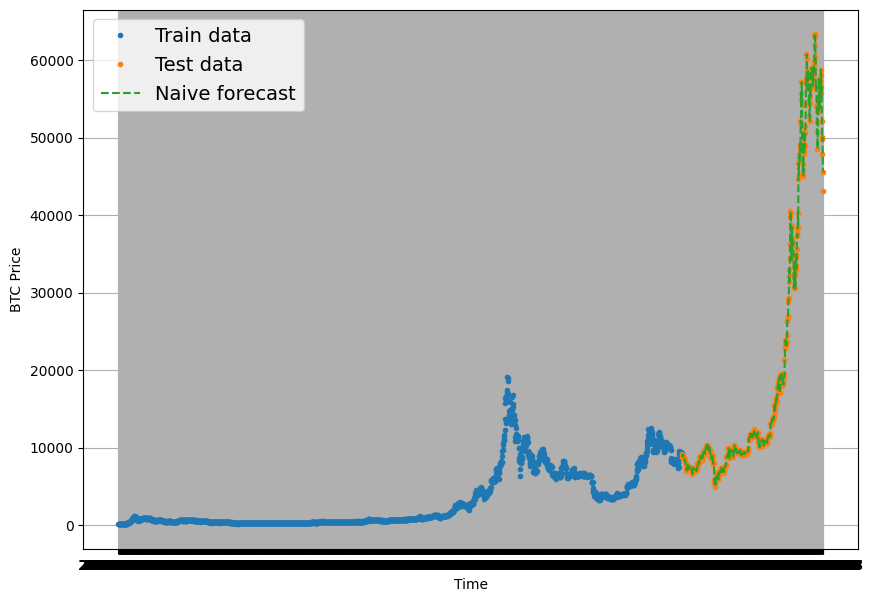

In [19]:
# plot naive forecast
plt.figure(figsize=(10,7))

plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, label="Naive forecast", format="--")

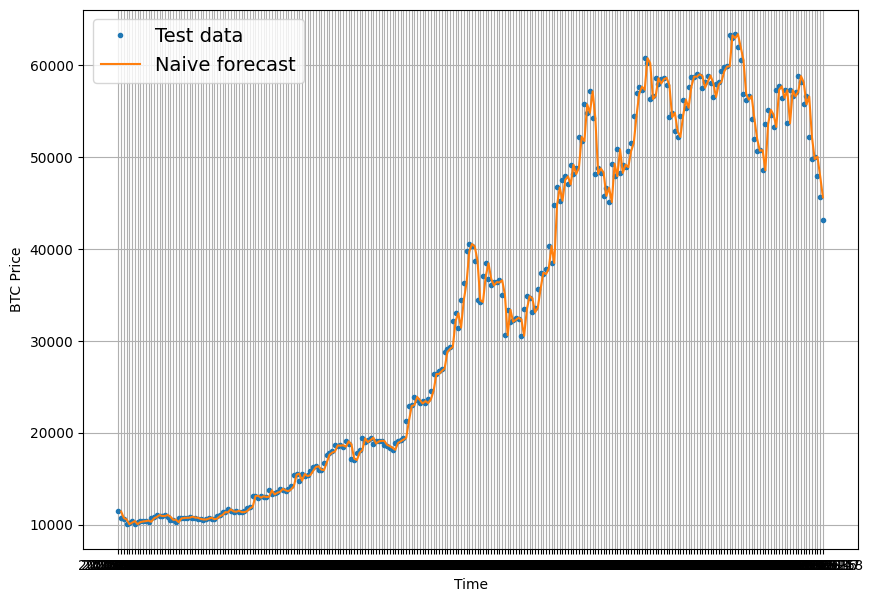

In [20]:
plt.figure(figsize=(10, 7))
offset = 300 # offset the values by 300 timesteps 
plot_time_series(timesteps=X_test, values=y_test, start=offset, label="Test data")
plot_time_series(timesteps=X_test[1:], values=naive_forecast, format="-", start=offset, label="Naive forecast");

Evaluating a time series model

The main thing we will be evaluating is: how do our model's predictions (y_pred) compare against the actual values (y_true or ground truth values)?

Scale-dependent errors

MAE (mean absolute error): Easy to interpret (a forecast is X amount different from actual amount). Forecast methods which minimises the MAE will lead to forecasts of the median.	tf.keras.metrics.mean_absolute_error()

RMSE (root mean square error)	Forecasts which minimise the RMSE lead to forecasts of the mean.	tf.sqrt(tf.keras.metrics.mean_square_error())

Percentage errors

MAPE (mean absolute percentage error)	Most commonly used percentage error. May explode (not work) if y=0.	tf.keras.metrics.mean_absolute_percentage_error()  

sMAPE (symmetric mean absolute percentage error)	Recommended not to be used by Forecasting: Principles and Practice, though it is used in forecasting competitions.	Custom implementation

Scaled errors

MASE (mean absolute scaled error).	MASE equals one for the naive forecast (or very close to one). A forecast which performs better than the naïve should get <1 MASE.	See sktime's mase_loss()

In [21]:
import tensorflow as tf

def mean_scaled_absolute_error(y_true, y_pred):
    mae=tf.reduce_mean(tf.abs(y_true - y_pred))
    mae_naive_no_season=tf.reduce_mean(tf.abs(y_true[1:] - y_true[:-1]))
    
    return mae/mae_naive_no_season
    
    

different evaluation metrics together into a function.

In [22]:
import tensorflow as tf

# Define MASE (Mean Absolute Scaled Error)
def mean_scaled_absolute_error(y_true, y_pred):
    """
    Computes Mean Absolute Scaled Error (MASE).
    Assumes naive forecast = y_t-1
    """
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))

    # naive forecast: shift by one step
    naive_forecast = y_true[:-1]
    actual = y_true[1:]

    mae_naive = tf.reduce_mean(tf.abs(actual - naive_forecast))

    return mae / mae_naive


def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, tf.float32)
    y_pred = tf.cast(y_pred, tf.float32)

    # compute metrics directly
    mae = tf.reduce_mean(tf.abs(y_true - y_pred))
    mse = tf.reduce_mean(tf.square(y_true - y_pred))
    rmse = tf.sqrt(mse)
    mape = tf.reduce_mean(tf.abs((y_true - y_pred) / y_true)) * 100.0
    mase = mean_scaled_absolute_error(y_true, y_pred)

    return {
        "mae": mae.numpy(),
        "mse": mse.numpy(),
        "rmse": rmse.numpy(),
        "mape": mape.numpy(),
        "mase": mase.numpy()
    }


In [23]:
naive_results=evaluate_preds(y_true=y_test[1:], y_pred=naive_forecast)

naive_results

{'mae': np.float32(567.9802),
 'mse': np.float32(1147547.0),
 'rmse': np.float32(1071.2362),
 'mape': np.float32(2.5165248),
 'mase': np.float32(0.99957)}

Moving Average:  https://machinelearningmastery.com/moving-average-smoothing-for-time-series-forecasting-python/  

ARIMA (Autoregression Integrated Moving Average)	https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/  

sktime (Scikit-Learn for time series)	https://github.com/alan-turing-institute/sktime  

TensorFlow Decision Forests (random forest, gradient boosting trees)	https://www.tensorflow.org/decision_forests  

Facebook Kats (purpose-built forecasting and time series analysis library by Facebook)	https://github.com/facebookresearch/Kats  

LinkedIn Greykite (flexible, intuitive and fast forecasts)	https://github.com/linkedin/greykite


# Format Data Part 2: Windowing dataset

Windowing is a method to turn a time series dataset into supervised learning problem.

In other words, we want to use windows of the past to predict the future.

For example for a univariate time series, windowing for one week (window=7) to predict the next single value (horizon=1) might look like:

Window for one week (univariate time series)

[0, 1, 2, 3, 4, 5, 6] -> [7]  
[1, 2, 3, 4, 5, 6, 7] -> [8]  
[2, 3, 4, 5, 6, 7, 8] -> [9]

the price of Bitcoin, it'd look like:

Window for one week with the target of predicting the next day (Bitcoin prices)

[123.654, 125.455, 108.584, 118.674, 121.338, 120.655, 121.795] -> [123.033]  
[125.455, 108.584, 118.674, 121.338, 120.655, 121.795, 123.033] -> [124.049]  
[108.584, 118.674, 121.338, 120.655, 121.795, 123.033, 124.049] -> [125.961]

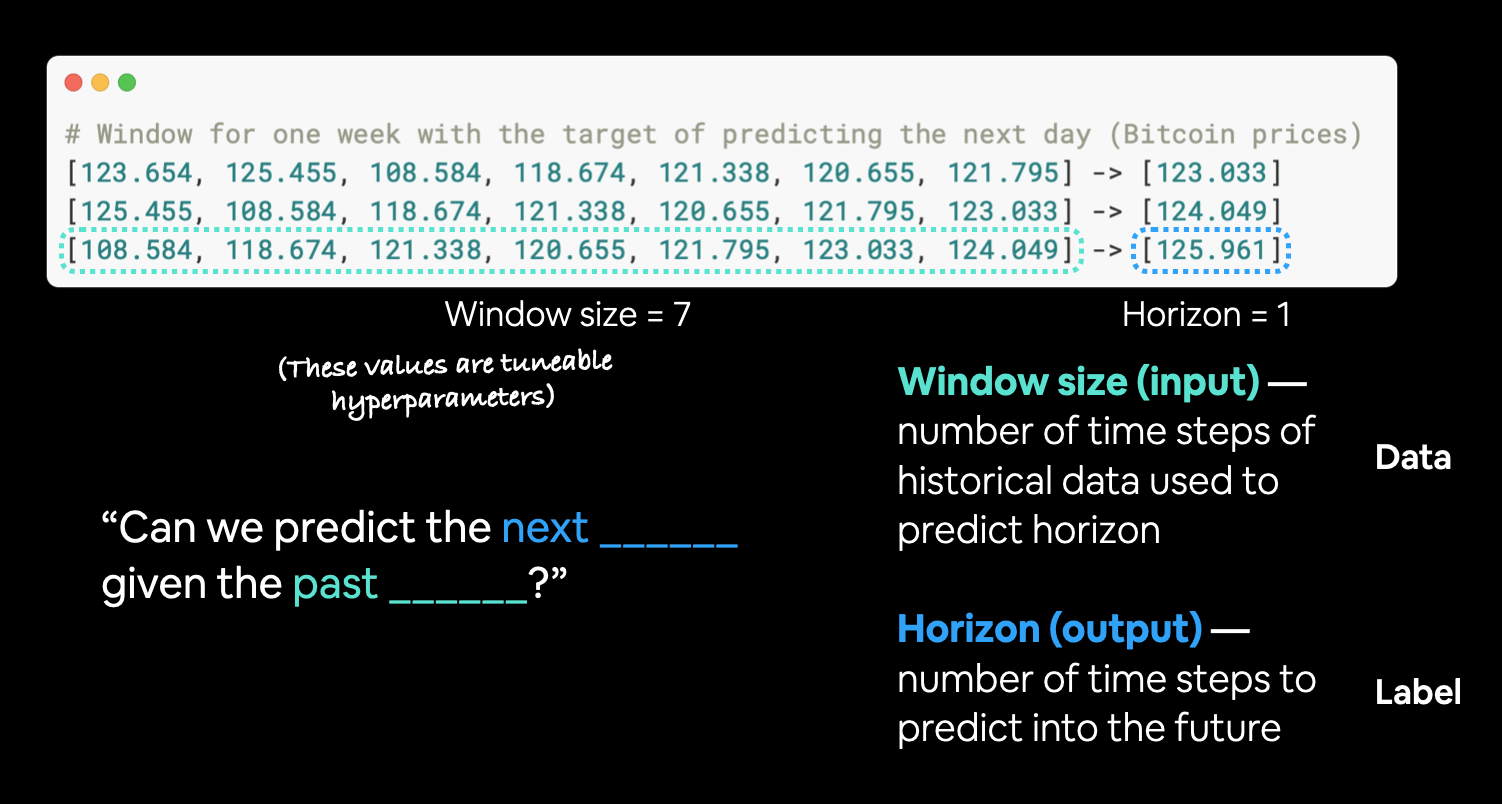

In [24]:
HORIZON = 1 # predict 1 step at a time
WINDOW_SIZE = 7 # use a week worth of timesteps to predict the horizon

In [25]:
def get_labelled_windows(x,horizon=1):
    return x[:,:-horizon],x[:,-horizon:]

In [26]:
# test out the window labelling function

test_window,test_label=get_labelled_windows(tf.constant([[1,2,3,4,5,6,7,8]]), horizon=HORIZON)
print(f"Test window: {test_window}, Test label: {test_label}")

Test window: [[1 2 3 4 5 6 7]], Test label: [[8]]


We could do this with Python for loops, however, for large time series, that'd be quite slow.

To speed things up, we'll leverage NumPy's array indexing.

Let's write a function which:

Creates a window step of specific window size, for example: [[0, 1, 2, 3, 4, 5, 6, 7]]
Uses NumPy indexing to create a 2D of multiple window steps, for example:

[[0, 1, 2, 3, 4, 5, 6, 7],  
 [1, 2, 3, 4, 5, 6, 7, 8],  
 [2, 3, 4, 5, 6, 7, 8, 9]]

Uses the 2D array of multuple window steps to index on a target series
Uses the get_labelled_windows() function we created above to turn the window steps into windows with a specified horizon

In [27]:
# Create function to view NumPy arrays as windows 
def make_windows(x, window_size=7, horizon=1):
  """
  Turns a 1D array into a 2D array of sequential windows of window_size.
  """
  # 1. Create a window of specific window_size (add the horizon on the end for later labelling)
  window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
  # print(f"Window step:\n {window_step}")

  # 2. Create a 2D array of multiple window steps (minus 1 to account for 0 indexing)
  window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T # create 2D array of windows of size window_size
  # print(f"Window indexes:\n {window_indexes[:3], window_indexes[-3:], window_indexes.shape}")

  # 3. Index on the target array (time series) with 2D array of multiple window steps
  windowed_array = x[window_indexes]

  # 4. Get the labelled windows
  windows, labels = get_labelled_windows(windowed_array, horizon=horizon)

  return windows, labels

In [28]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2780, 2780)

In [29]:
# View the first 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i]} -> Label: {full_labels[i]}")

Window: [123.65499 125.455   108.58483 118.67466 121.33866 120.65533 121.795  ] -> Label: [123.033]
Window: [125.455   108.58483 118.67466 121.33866 120.65533 121.795   123.033  ] -> Label: [124.049]
Window: [108.58483 118.67466 121.33866 120.65533 121.795   123.033   124.049  ] -> Label: [125.96116]


In [30]:
# View the last 3 windows/labels
for i in range(3):
  print(f"Window: {full_windows[i-3]} -> Label: {full_labels[i-3]}")

Window: [58788.20967893 58102.19142623 55715.54665129 56573.5554719
 52147.82118698 49764.1320816  50032.69313676] -> Label: [47885.62525472]
Window: [58102.19142623 55715.54665129 56573.5554719  52147.82118698
 49764.1320816  50032.69313676 47885.62525472] -> Label: [45604.61575361]
Window: [55715.54665129 56573.5554719  52147.82118698 49764.1320816
 50032.69313676 47885.62525472 45604.61575361] -> Label: [43144.47129086]


Turning windows into training and test sets

In [42]:
# make the train/test splits

def make_train_test_splits(windows, labels, split_size=0.2):
    
    split_size=int(len(windows) * (1 - split_size)) # 80% train, 20% test
    
    train_windows, train_labels = windows[:split_size], labels[:split_size]
    test_windows, test_labels = windows[split_size:], labels[split_size:]   
    return train_windows,test_windows, train_labels, test_labels

In [43]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2224, 556, 2224, 556)

the default split of 80% training data and 20% testing data (this split can be adjusted if needed).

In [44]:
# first 5 train windows and labels
train_windows[:5], train_labels[:5]

(array([[123.65499, 125.455  , 108.58483, 118.67466, 121.33866, 120.65533,
         121.795  ],
        [125.455  , 108.58483, 118.67466, 121.33866, 120.65533, 121.795  ,
         123.033  ],
        [108.58483, 118.67466, 121.33866, 120.65533, 121.795  , 123.033  ,
         124.049  ],
        [118.67466, 121.33866, 120.65533, 121.795  , 123.033  , 124.049  ,
         125.96116],
        [121.33866, 120.65533, 121.795  , 123.033  , 124.049  , 125.96116,
         125.27966]]),
 array([[123.033  ],
        [124.049  ],
        [125.96116],
        [125.27966],
        [125.9275 ]]))

Make a modelling checkpoint

our model's performance will fluctuate from experiment to experiment, we'll want to make sure we're comparing apples to apples.

What I mean by this is in order for a fair comparison, we want to compare each model's best performance against each model's best performance.

For example, if model_1 performed incredibly well on epoch 55 but its performance fell off toward epoch 100, we want the version of the model from epoch 55 to compare to other models rather than the version of the model from epoch 100.

And the same goes for each of our other models: compare the best against the best.

To take of this, we'll implement a ModelCheckpoint callback.

The ModelCheckpoint callback will monitor our model's performance during training and save the best model to file by setting save_best_only=True.

That way when evaluating our model we could restore its best performing configuration from file.

Note: Because of the size of the dataset (smaller than usual), you'll notice our modelling experiment results fluctuate quite a bit during training (hence the implementation of the ModelCheckpoint callback to save the best model).

In [45]:
import os

def create_model_checkpoint(model_name,save_path="model_experiments"):
    return tf.keras.callbacks.ModelCheckpoint(
        filepath=os.path.join(save_path, model_name + ".keras"),
        verbose=0,
        save_best_only=True
    )
    

Model 1: Dense model (window=7,horizon=1)

model_1 have:

A single dense layer with 128 hidden units and ReLU (rectified linear unit) activation  
An output layer with linear activation (or no activation)  
Adam optimizer and MAE loss function  
Batch size of 128  
100 epochs  

In [46]:
import tensorflow as tf
from tensorflow.keras import layers

# set random seed
tf.random.set_seed(42)

model_1=tf.keras.Sequential([
    layers.Dense(128,activation='relu'),
    layers.Dense(HORIZON, activation='linear') # predict 1 step at a time
], name="model_1_dense")  # give the model a name so we can save it later

model_1.compile(loss='mae',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

model_1.fit(x=train_windows,
            y=train_labels,
            epochs=100,
            verbose=1,
            batch_size=128,
            validation_data=(test_windows,test_labels),
            callbacks=[create_model_checkpoint(model_name=model_1.name)])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 1475.1174 - mae: 1475.1174 - val_loss: 2522.0444 - val_mae: 2522.0444
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 307.5240 - mae: 307.5240 - val_loss: 1070.9191 - val_mae: 1070.9191
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 196.3122 - mae: 196.3122 - val_loss: 1047.2601 - val_mae: 1047.2601
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 179.1158 - mae: 179.1158 - val_loss: 1005.8403 - val_mae: 1005.8403
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 171.9406 - mae: 171.9406 - val_loss: 999.9701 - val_mae: 999.9701
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 166.5498 - mae: 166.5498 - val_loss: 961.1716 - val_mae: 961.1716
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 161.4044 - mae: 161.4044 - val_loss: 922.6296 - val_mae: 922.6297
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 155.7155 - mae: 155.7155 - val_loss: 885.9092 - val_mae

In [ ]:
model_1.evaluate(test_windows,test_labels)   # last epoch model

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 280.9402 - mae: 280.9402 


[564.5869750976562, 564.5869750976562]

In [49]:
# load in saved best performing model
model_1=tf.keras.models.load_model("model_experiments/model_1_dense.keras")
model_1.evaluate(test_windows,test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 280.9402 - mae: 280.9402 


[564.5869750976562, 564.5869750976562]

Making forecasts with a model(on the test dataset)

I've trained a model and evaluated the it on the test data, but the project are working on is called BitPredict so how do you think we could use our model to make predictions?

Since we're going to be running more modelling experiments, let's write a function which:

1. Takes in a trained model (just like model_1)
2. Takes in some input data (just like the data the model was trained on)
3. Passes the input data to the model's predict() method
4. Returns the predictions

In [50]:
def make_predictions(model,input_data):
    """
    1. Takes in a trained model (just like model_1)
    2. Takes in some input data (just like the data the model was trained on)
    3. Passes the input data to the model's predict() method
    4. Returns the predictions
    """
    forecast=model.predict(input_data)
    return tf.squeeze(forecast)

In [53]:
# make predictions using the model_1 and test windows

model_1_preds=make_predictions(model=model_1,input_data=test_windows)

len(model_1_preds), len(test_labels)

18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


(556, 556)

In [54]:
# evaluate preds

model_1_results=evaluate_preds(y_true=tf.squeeze(test_labels),y_pred=model_1_preds)
model_1_results


{'mae': np.float32(564.587),
 'mse': np.float32(1156678.0),
 'rmse': np.float32(1075.4896),
 'mape': np.float32(2.5265357),
 'mase': np.float32(0.99182296)}

In [55]:
naive_results

{'mae': np.float32(567.9802),
 'mse': np.float32(1147547.0),
 'rmse': np.float32(1071.2362),
 'mape': np.float32(2.5165248),
 'mase': np.float32(0.99957)}

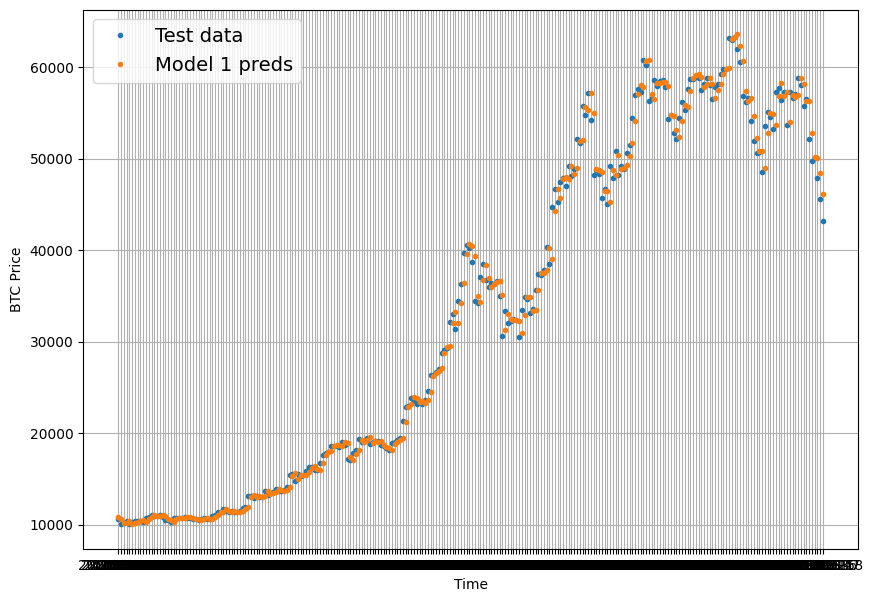

In [56]:
offset = 300 # offset the values by 300 timesteps
plt.figure(figsize=(10, 7))

plot_time_series(timesteps=X_test[-len(test_windows):], values=test_labels[:,0], start=offset, label="Test data")
plot_time_series(timesteps=X_test[-len(test_windows):], values=model_1_preds, start=offset, label="Model 1 preds")